## Requeriments

In [1]:
import numpy                 as np
#import pandas                as pd
import modin.pandas as pd
import matplotlib.pyplot     as plt
import seaborn               as sns

import statsmodels.api         as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

## Uploading data (dataXid)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
df
#PCA = pd.read_csv("/mnt/workstation/data/PCA.csv")

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [3]:
id_cli = df['id_registro']
df = df.drop(['id_registro'], axis=1)
#df = df.drop(['ind_mora_vigente'], axis=1)
#df = df.drop(['cartera_castigada'], axis=1)

In [4]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [5]:
features_f

Index(['categoria', 'cupo_total_tc', 'cuota_tc_bancolombia', 'mediana_nom3',
       'mediana_pen3', 'ingreso_nompen', 'ingreso_final', 'cuota_de_vivienda',
       'cuota_de_consumo', 'cuota_rotativos', 'cuota_tarjeta_de_credito',
       'cuota_de_sector_solidario', 'cuota_sector_real_comercio',
       'cupo_tc_mdo', 'saldo_prom3_tdc_mdo', 'cuota_tc_mdo',
       'saldo_no_rot_mdo', 'cuota_libranza_sf', 'ind', 'pol_centr_ext',
       'gasto_familiar', 'estado_civil_tag_gasto_familiar',
       'nivel_academico_tag_gasto_familiar'],
      dtype='object')

In [6]:
features_i

Index(['periodo', 'fecha_nacimiento', 'edad', 'ult_actual', 'codigo_ciiu',
       'ind_mora_vigente', 'cartera_castigada', 'mora_max',
       'cant_moras_30_ult_12_meses', 'cant_moras_60_ult_12_meses',
       'cant_moras_90_ult_12_meses', 'tenencia_tc', 'tiene_consumo',
       'tiene_crediagil', 'nro_tot_cuentas', 'ctas_activas',
       'tiene_ctas_activas', 'ctas_embargadas', 'tiene_ctas_embargadas',
       'pension_fopep', 'tiene_cred_hipo_1', 'tiene_cred_hipo_2',
       'cant_mora_30_tdc_ult_3m_sf', 'cant_mora_30_consum_ult_3m_sf',
       'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr',
       'profesion_tag_gasto_familiar', 'ocupacion_tag_gasto_familiar',
       'ciudad_residencia_tag_gasto_familiar',
       'rep_calif_cred_tag_gasto_familiar', 'genero_tag', 'anho', 'mes'],
      dtype='object')

In [7]:
feature_num = features_f.append(features_i)
feature_num

Index(['categoria', 'cupo_total_tc', 'cuota_tc_bancolombia', 'mediana_nom3',
       'mediana_pen3', 'ingreso_nompen', 'ingreso_final', 'cuota_de_vivienda',
       'cuota_de_consumo', 'cuota_rotativos', 'cuota_tarjeta_de_credito',
       'cuota_de_sector_solidario', 'cuota_sector_real_comercio',
       'cupo_tc_mdo', 'saldo_prom3_tdc_mdo', 'cuota_tc_mdo',
       'saldo_no_rot_mdo', 'cuota_libranza_sf', 'ind', 'pol_centr_ext',
       'gasto_familiar', 'estado_civil_tag_gasto_familiar',
       'nivel_academico_tag_gasto_familiar', 'periodo', 'fecha_nacimiento',
       'edad', 'ult_actual', 'codigo_ciiu', 'ind_mora_vigente',
       'cartera_castigada', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'tenencia_tc', 'tiene_consumo', 'tiene_crediagil', 'nro_tot_cuentas',
       'ctas_activas', 'tiene_ctas_activas', 'ctas_embargadas',
       'tiene_ctas_embargadas', 'pension_fopep', 'tiene_cred_hipo_1',
       'tiene_cred_hipo

In [6]:
df[features_o].describe(include='all').T

,count,unique,top,freq
estado_civil,9527193,5,SOLTERO,4609348
nivel_academico,9527193,6,UNIVERSITARIO,5755845
profesion,9527193,79,OTROS,3561488
ocupacion,9527193,10,Empleado,7158608
ciudad_residencia,9527193,803,PEDRAZA,2634338
rep_calif_cred,9527193,8,A,2693172
genero,9527193,2,F,4941539


## Correlation

Text(0.5, 1.0, 'Correlación de variables numericas')

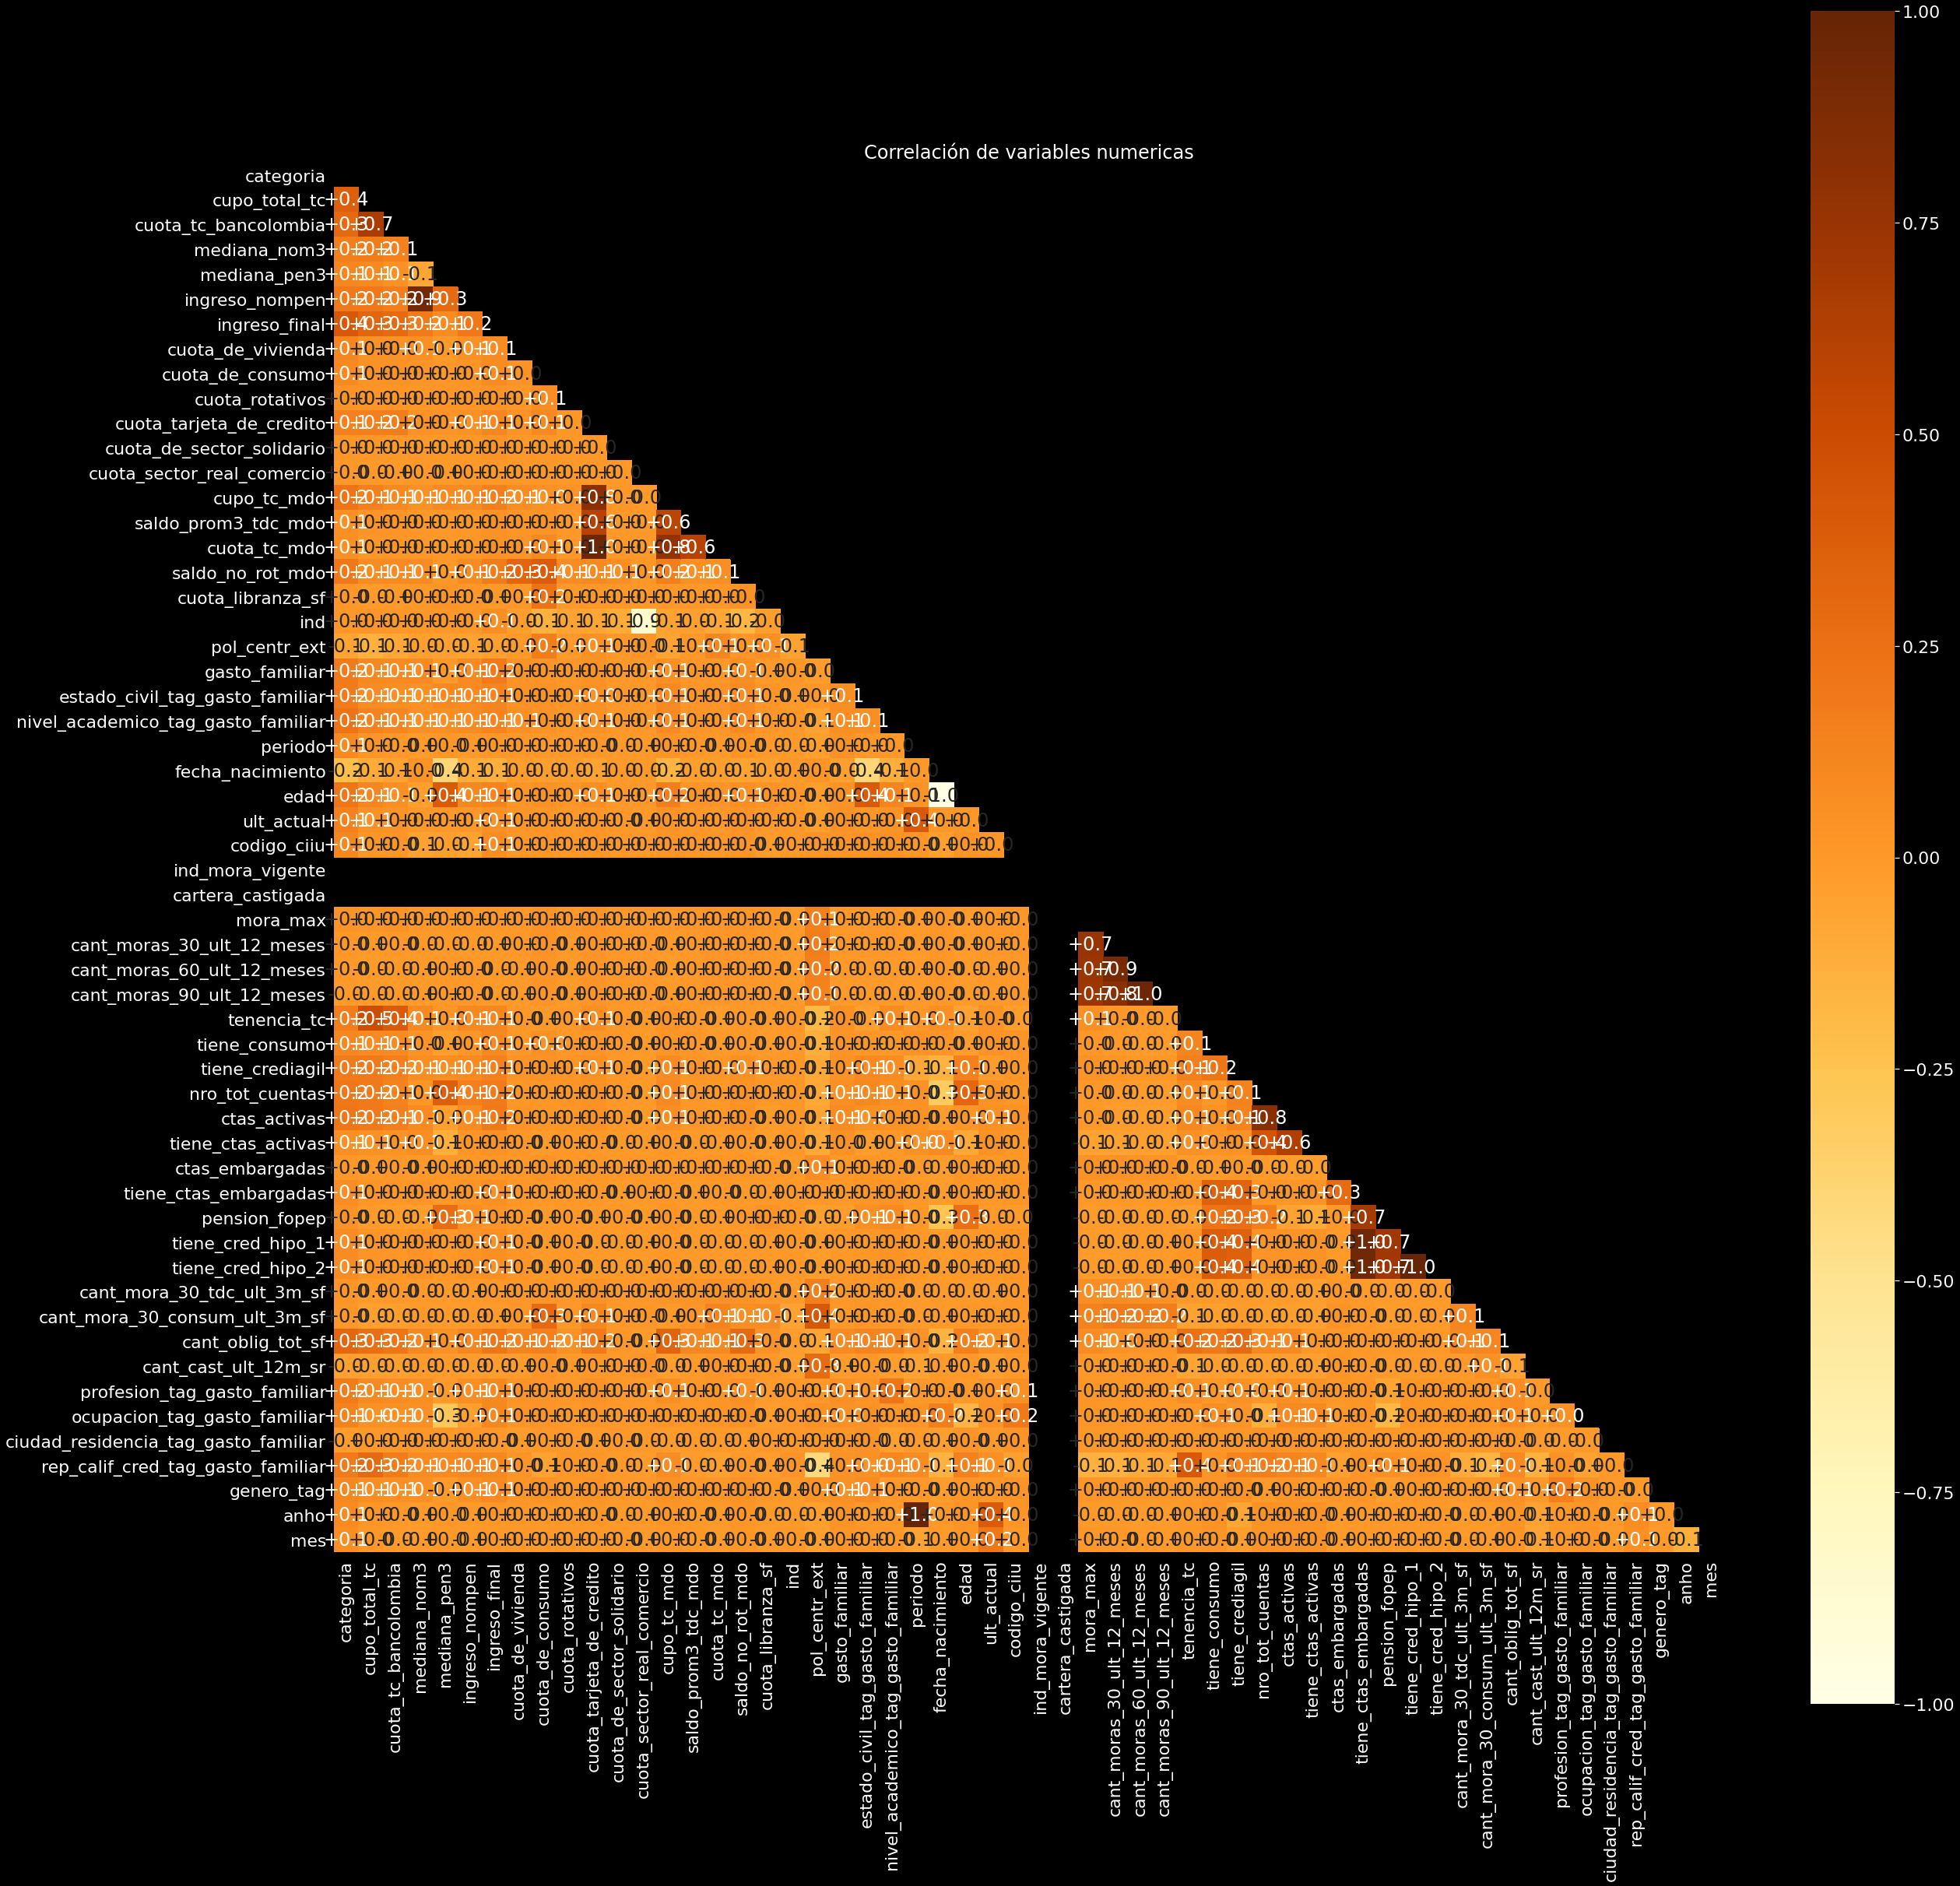

In [9]:
#plt.rcParams.update({'font.size': 13})
#compute correlation matrix
df_correlations = df[list(feature_num)].corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.set(font_scale=2)
plt.style.use("dark_background")
plt.figure(figsize= (40,40))
sns.heatmap(df_correlations, mask=mask, cmap="YlOrBr",#"RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1,
    fmt="+.1f")
plt.title("Correlación de variables numericas")

In [10]:
sorted_pairs = df_correlations.unstack().sort_values(kind="quicksort", ascending = False)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs = strong_pairs[abs(sorted_pairs) < 1]
strong_pairs = pd.DataFrame(strong_pairs)
strong_pairs.columns = ['Correlation']
strong_pairs.drop_duplicates(subset=['Correlation'],inplace = True)
strong_pairs.reset_index(inplace=True)
strong_pairs

,level_0,level_1,Correlation
0,anho,periodo,0.997978
1,cuota_tarjeta_de_credito,cuota_tc_mdo,0.961309
2,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,0.955279
3,tiene_ctas_embargadas,tiene_cred_hipo_2,0.951500
4,ingreso_nompen,mediana_nom3,0.933154
5,cant_moras_60_ult_12_meses,cant_moras_30_ult_12_meses,0.909586
6,nro_tot_cuentas,ctas_activas,0.825770
7,cuota_tarjeta_de_credito,cupo_tc_mdo,0.818614
8,cant_moras_30_ult_12_meses,cant_moras_90_ult_12_meses,0.817283
9,cuota_tc_mdo,cupo_tc_mdo,0.778563


# Vs Gasto familiar

In [11]:
sorted_pairs = df_correlations.unstack().sort_values(kind="quicksort", ascending = False)
high_cor = sorted_pairs[abs(sorted_pairs) < 2]
high_cor = pd.DataFrame(high_cor)
high_cor.columns = ['Correlation']
high_cor.drop_duplicates(subset=['Correlation'],inplace = True)
high_cor.reset_index(inplace=True)
high_cor = high_cor[high_cor['level_1'] == 'gasto_familiar']
high_cor.columns = ['level_0', 'level_key', 'Correlation']
level_uno = high_cor[['level_key','level_0', 'Correlation']]

In [12]:
sorted_pairs = df_correlations.unstack().sort_values(kind="quicksort", ascending = False)
high_cor = sorted_pairs[abs(sorted_pairs) < 2]
high_cor = pd.DataFrame(high_cor)
high_cor.columns = ['Correlation']
high_cor.drop_duplicates(subset=['Correlation'],inplace = True)
high_cor.reset_index(inplace=True)
high_cor = high_cor[high_cor['level_0'] == 'gasto_familiar']
level_cero = high_cor
#level_cero = pd.DataFrame(columns = ['level_0', 'level_1', 'Correlation'],data=high_cor)
level_cero.columns = ['level_key','level_0', 'Correlation']

In [13]:
corr_gasto_familiar = level_uno.append(level_cero)
corr_gasto_familiar['Correlation'] = [abs(x) for x in corr_gasto_familiar['Correlation']]
corr_gasto_familiar.sort_values(by='Correlation',inplace=True, ascending = False)
corr_gasto_familiar

,level_key,level_0,Correlation
82,gasto_familiar,ingreso_final,0.185598
84,gasto_familiar,categoria,0.181773
158,gasto_familiar,cupo_total_tc,0.107134
195,gasto_familiar,cuota_tc_bancolombia,0.089766
201,gasto_familiar,mediana_nom3,0.087101
203,gasto_familiar,cant_oblig_tot_sf,0.086958
207,gasto_familiar,ingreso_nompen,0.086172
226,gasto_familiar,ctas_activas,0.079449
257,gasto_familiar,nivel_academico_tag_gasto_familiar,0.065808
258,gasto_familiar,estado_civil_tag_gasto_familiar,0.065431


## Tie Break (by best cor gasto_familiar)

In [14]:
to_delete = []

for i in strong_pairs.index:
    if corr_gasto_familiar[corr_gasto_familiar['level_0'] == strong_pairs.loc[i,'level_0']].index > corr_gasto_familiar[corr_gasto_familiar['level_0'] == strong_pairs.loc[i,'level_1']].index:
        to_delete.append(strong_pairs.loc[i,'level_0'])
    else:
        to_delete.append(strong_pairs.loc[i,'level_1'])
        
to_delete

['anho',
 'cuota_tc_mdo',
 'cant_moras_90_ult_12_meses',
 'tiene_ctas_embargadas',
 'ingreso_nompen',
 'cant_moras_60_ult_12_meses',
 'nro_tot_cuentas',
 'cuota_tarjeta_de_credito',
 'cant_moras_90_ult_12_meses',
 'cuota_tc_mdo',
 'cant_moras_30_ult_12_meses',
 'cant_moras_60_ult_12_meses',
 'cant_moras_90_ult_12_meses',
 'pension_fopep',
 'pension_fopep',
 'cuota_tc_bancolombia',
 'tiene_ctas_activas',
 'saldo_prom3_tdc_mdo',
 'saldo_prom3_tdc_mdo',
 'saldo_prom3_tdc_mdo',
 'cuota_sector_real_comercio',
 'fecha_nacimiento']

In [4]:
to_delete = ['anho',
 'cuota_tc_mdo',
 'cant_moras_90_ult_12_meses',
 'tiene_ctas_embargadas',
 'ingreso_nompen',
 'cant_moras_60_ult_12_meses',
 'nro_tot_cuentas',
 'cuota_tarjeta_de_credito',
 'cant_moras_90_ult_12_meses',
 'cuota_tc_mdo',
 'cant_moras_30_ult_12_meses',
 'cant_moras_60_ult_12_meses',
 'cant_moras_90_ult_12_meses',
 'pension_fopep',
 'pension_fopep',
 'cuota_tc_bancolombia',
 'tiene_ctas_activas',
 'saldo_prom3_tdc_mdo',
 'saldo_prom3_tdc_mdo',
 'saldo_prom3_tdc_mdo',
 'cuota_sector_real_comercio',
 'fecha_nacimiento']

In [5]:
len(to_delete)

22

to_delete = ['mediana_pen3_desv',
             'cant_moras_60_ult_12_meses',
            'cant_moras_90_ult_12_meses',
            'cant_moras_30_ult_12_meses',
            'ingreso_nompen',
            'ingreso_final_desv',
            'mediana_nom3',
            'mediana_nom3_desv',
            'saldo_prom3_tdc_mdo',
            'cant_oblig_tot_sf',
            'estado_civil',
            'profesion',
             'ocupacion',
             'ciudad_residencia',
             'genero',
             'rep_calif_cred'
            ]

pd.options.display.max_rows = None
pd.options.display.max_columns = None
df.rename(columns = {'genero_tag':'genero_num'},inplace=True)
indices = df.columns.str.extract(r"(_gasto_familiar)").dropna().index
df_var = df.iloc[:,indices]
indices2 = df.columns.str.extract(r"(tag)").isna()[0].to_list()
df_indices2 = df.loc[:,indices2]
df_final = pd.concat([df_indices2,df_var],axis=1)
df_final.head(30)

## 1. LM with  all variables no correlated

In [6]:
X = df.columns[~df.columns.isin(to_delete)]
y = 'gasto_familiar'

In [7]:
df[X].shape

(9527193, 48)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.90)
X_train.shape

(952719, 48)

In [9]:
formula = '{} ~ {}'.format(y,' + '.join(col for col in df[X].columns if col != 'gasto_familiar'))
formula

'gasto_familiar ~ periodo + edad + ult_actual + categoria + codigo_ciiu + ind_mora_vigente + cartera_castigada + mora_max + cupo_total_tc + tenencia_tc + tiene_consumo + tiene_crediagil + ctas_activas + ctas_embargadas + tiene_cred_hipo_1 + tiene_cred_hipo_2 + mediana_nom3 + mediana_pen3 + ingreso_final + cant_mora_30_tdc_ult_3m_sf + cant_mora_30_consum_ult_3m_sf + cuota_de_vivienda + cuota_de_consumo + cuota_rotativos + cuota_de_sector_solidario + cupo_tc_mdo + saldo_no_rot_mdo + cuota_libranza_sf + cant_oblig_tot_sf + cant_cast_ult_12m_sr + ind + pol_centr_ext + estado_civil_tag_gasto_familiar + nivel_academico_tag_gasto_familiar + profesion_tag_gasto_familiar + ocupacion_tag_gasto_familiar + ciudad_residencia_tag_gasto_familiar + rep_calif_cred_tag_gasto_familiar + genero_tag + estado_civil + nivel_academico + profesion + ocupacion + ciudad_residencia + rep_calif_cred + genero + mes'

In [10]:
ml = smf.ols(formula, data = X_train).fit()
print(ml.summary())

                            OLS Regression Results                            
Dep. Variable:         gasto_familiar   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     65.37
Date:                Sat, 30 Jan 2021   Prob (F-statistic):               0.00
Time:                        02:07:46   Log-Likelihood:            -1.4882e+07
No. Observations:              952719   AIC:                         2.977e+07
Df Residuals:                  951856   BIC:                         2.978e+07
Df Model:                         862                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [11]:
df[X].shape[1]

48

In [12]:
best_pvalues = ml.pvalues[ml.pvalues < 0.05/(df[X].shape[1]-1)].sort_values()
best_pvalues = pd.DataFrame(best_pvalues)
best_pvalues.reset_index(inplace=True)
best_pvalues[['Variable','Categoria']] = best_pvalues['index'].str.split("[",expand=True)
to_continue = best_pvalues[best_pvalues['Variable']!= 'Intercept']['Variable'].unique()
list(to_continue)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad']

## 2. LM with Best p-Value variables

In [4]:
X = ['categoria',
     'ingreso_final',
     'mediana_nom3',
     'profesion',
     'nivel_academico',
     'ocupacion',
     'ocupacion_tag_gasto_familiar',
     'estado_civil',
     'rep_calif_cred',
     'genero',
     'cartera_castigada',
     'ind_mora_vigente',
     'rep_calif_cred_tag_gasto_familiar',
     'genero_tag',
     'estado_civil_tag_gasto_familiar',
     'nivel_academico_tag_gasto_familiar',
     'profesion_tag_gasto_familiar',
     'ctas_activas',
     'ult_actual',
     'tiene_cred_hipo_2',
     'tiene_cred_hipo_1',
     'cant_oblig_tot_sf',
     'periodo',
     'tenencia_tc',
     'cupo_total_tc',
     'mes',
     'saldo_no_rot_mdo',
     'mediana_pen3',
     'ciudad_residencia',
     'edad',
    'gasto_familiar']

In [5]:
#X = pd.DataFrame(to_continue)[0]
y = 'gasto_familiar'

In [6]:
df[X].shape

(9527193, 31)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.85)

In [8]:
formula = '{} ~ {}'.format(y,' + '.join(col for col in df[X].columns if col != 'gasto_familiar'))
formula

'gasto_familiar ~ categoria + ingreso_final + mediana_nom3 + profesion + nivel_academico + ocupacion + ocupacion_tag_gasto_familiar + estado_civil + rep_calif_cred + genero + cartera_castigada + ind_mora_vigente + rep_calif_cred_tag_gasto_familiar + genero_tag + estado_civil_tag_gasto_familiar + nivel_academico_tag_gasto_familiar + profesion_tag_gasto_familiar + ctas_activas + ult_actual + tiene_cred_hipo_2 + tiene_cred_hipo_1 + cant_oblig_tot_sf + periodo + tenencia_tc + cupo_total_tc + mes + saldo_no_rot_mdo + mediana_pen3 + ciudad_residencia + edad'

In [9]:
ml_best_pvalues = smf.ols(formula, data = X_train).fit()
print(ml_best_pvalues.summary())

NameError: name 'ml' is not defined

In [10]:
print(ml_best_pvalues.summary())

                            OLS Regression Results                            
Dep. Variable:         gasto_familiar   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     86.82
Date:                Sat, 30 Jan 2021   Prob (F-statistic):               0.00
Time:                        02:26:49   Log-Likelihood:            -2.2391e+07
No. Observations:             1429078   AIC:                         4.478e+07
Df Residuals:                 1428197   BIC:                         4.479e+07
Df Model:                         880                                         
Covariance Type:            nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [11]:
df[X].shape[1]

31

In [13]:
best_pvalues2 = ml_best_pvalues.pvalues[ml_best_pvalues.pvalues < 0.05/(df[X].shape[1]-1)].sort_values()
best_pvalues2 = pd.DataFrame(best_pvalues2)
best_pvalues2.reset_index(inplace=True)
best_pvalues2[['Variable','Categoria']] = best_pvalues2['index'].str.split("[",expand=True)
to_continue2 = best_pvalues2[best_pvalues2['Variable']!= 'Intercept']['Variable'].unique()
list(to_continue2)

['mediana_nom3',
 'ingreso_final',
 'categoria',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'nivel_academico',
 'rep_calif_cred',
 'estado_civil',
 'genero',
 'ind_mora_vigente',
 'cartera_castigada',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'cupo_total_tc',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'ult_actual',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'saldo_no_rot_mdo',
 'mes',
 'ciudad_residencia',
 'edad',
 'mediana_pen3']

In [14]:
X = pd.DataFrame(data = X, columns=['Selected_variables'])
X

,Selected_variables
0,categoria
1,ingreso_final
2,mediana_nom3
3,profesion
4,nivel_academico
5,ocupacion
6,ocupacion_tag_gasto_familiar
7,estado_civil
8,rep_calif_cred
9,genero


In [15]:
X.to_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv", index=False)

In [17]:
records_toevaluate = pd.read_csv("/mnt/workstation/data/Alomarrano/records_toevaluate.csv")
records_toevaluate

,id_registro
0,4055#201902
1,12598#201902
2,23697#201902
3,23768#201902
4,7174#201902
...,...
281661,8596193#202011
281662,8616083#202011
281663,8670207#202011
281664,8677655#202011


In [4]:
sub_ppca = pd.DataFrame()
sub_ppca['id_registro'] = id_cli
sub_ppca['gasto_familiar'] = df['gasto_familiar']
sub_ppca = sub_ppca.iloc[-281666:,]
sub_ppca
#sub_ppca[sub_ppca['id_registro'].isin(records_toevaluate)]

,id_registro,gasto_familiar
9245527,4055#201902,8.737564e+05
9245528,12598#201902,7.803936e+05
9245529,23697#201902,7.984694e+05
9245530,23768#201902,7.373377e+05
9245531,7174#201902,7.869972e+05
...,...,...
9527188,8596193#202011,7.431714e+05
9527189,8616083#202011,8.502165e+05
9527190,8670207#202011,7.853290e+05
9527191,8677655#202011,1.029045e+06


In [5]:
sub_ppca.to_csv("/mnt/workstation/data/Alomarrano/Sub_PPCA.csv", index=False)

To request implementation, send an email to feature_requests@modin.org.
